<a href="https://colab.research.google.com/github/candelarobledof/parkinson/blob/main/Copia_de_Regresi%C3%B3n_Log%C3%ADstica_y_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [91]:
df=pd.read_csv("becarios.csv")
df2=pd.read_csv('basests.csv')

In [92]:
print(df.shape)
df.head(3)

(2546, 135)


,recordId1,healthCode1,createdOn1,appVersion1,"JJ""phoneInfo",medTimepoint,audio_audio#m4a,audio_countdown#m4a,frameTime,F0semitoneFrom27#5Hz_sma3nz_amean,F0semitoneFrom27#5Hz_sma3nz_stddevNorm,F0semitoneFrom27#5Hz_sma3nz_percentile20#0,F0semitoneFrom27#5Hz_sma3nz_percentile50#0,F0semitoneFrom27#5Hz_sma3nz_percentile80#0,F0semitoneFrom27#5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27#5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27#5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27#5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27#5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20#0,loudness_sma3_percentile50#0,loudness_sma3_percentile80#0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,validacion,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,...,medication-start-year,onset-year,packs-per-day,past-participation,phone-usage,race,smartphone,smoked,surgery,video-usage,years-smoking,ROW_ID,ROW_VERSION,recordId,healthCode,createdOn,appVersion,phoneInfo,EQ-5D1,GELTQ-1a,GELTQ-1b,GELTQ-1c,GELTQ-2,MDS-UPDRS1 3,MDS-UPDRS1 4,MDS-UPDRS1 5,MDS-UPDRS1 7,MDS-UPDRS1 8,MDS-UPDRS2 1,MDS-UPDRS2 4,MDS-UPDRS2 5,MDS-UPDRS2 6,MDS-UPDRS2 7,MDS-UPDRS2 8,MDS-UPDRS2 9,MDS-UPDRS2 10,MDS-UPDRS2 12,MDS-UPDRS2 13,MDS-UPDRS1 1,professional-diagnosis
0,f5f9fe7a-16ea-4729-ad36-4adf16d640d3,00081bd9-9abd-4003-b035-de6cc3e8c922,2015-04-24 11:43:46.000,"version 1.0.5, build 12",iPhone 6,I don't take Parkinson medications,5911541,5911575,0,29.43724,0.147913,29.09326,29.94629,30.27972,1.186460,268.321900,318.870000,220.726300,155.224600,1.239076,0.760484,0.336663,1.139049,2.213950,1.877287,5.434294,7.509209,16.042990,24.681170,0.044515,2.031568,1.026207,0.763972,5.635386,1.047144,0,2.775975,3.135737,23.86835,0.364966,...,0.0,NaN,1.0,False,false,East Asian,Easy,True,False,True,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,e6faeb0a-c919-4726-a62c-f1d07bfa05fa,0085b356-0550-4cf1-85bd-2bcd89bf1201,2015-05-20 17:37:08.000,"version 1.0.5, build 12",iPhone 5s (GSM),Another time,5738698,5738725,0,25.07906,0.022314,24.75333,24.96259,25.27861,0.525288,77.777370,122.096200,6.490576,5.274602,1.598153,0.230859,1.342744,1.586495,1.940588,0.597844,4.072270,2.199968,1.997201,2.071721,0.006010,1.184233,0.365015,1.240886,7.443104,0.231679,0,-0.468550,-4.964474,8.40042,0.456547,...,2009.0,2009.0,1.0,True,true,White or Caucasian,Very easy,True,False,False,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,819ced7b-7437-4eca-9c96-85c9a630bc71,00dc061b-8151-44cc-8eae-4d10f11a5ab6,2015-03-31 19:02:42.000,"version 1.0, build 7",iPhone 5c (GSM),Immediately before Parkinson medication,6061823,6061843,0,30.28607,0.016195,29.85055,30.21422,30.64663,0.796078,3.399709,1.435303,3.445418,3.067692,0.881381,0.073002,0.827307,0.877551,0.931256,0.103949,0.957957,0.629951,0.769095,0.500005,0.003496,0.585721,0.208283,0.515115,10.869530,0.027975,0,-2.195964,-1.029112,35.48409,0.083729,...,2014.0,2014.0,NaN,True,true,White or Caucasian,Very easy,False,False,False,NaN,3141.0,2.0,add494b6-b6bc-47fe-8ffe-92cf8943f287,00dc061b-8151-44cc-8eae-4d10f11a5ab6,1.426110e+12,version 1.0,build 7,iPhone 5c (GSM),100.0,2.0,1.0,2.0,Sometimes,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True


Modifico categoricas a dummies:

In [93]:
df['professional-diagnosis'].replace(False,0, inplace=True)
df['professional-diagnosis'].replace(True,1, inplace=True)

In [94]:
df = pd.get_dummies(df, columns = ["gender","are-caretaker","deep-brain-stimulation","medical-usage-yesterday","past-participation"
                                    ,"phone-usage","smoked","surgery","video-usage"], drop_first = True)

In [95]:
print(df2.shape)
df2.head(3)

(2218, 11)


,ROW_ID,age,EdadR,DIAGNOSTICO,M_POINT,SEX,d1,d2,d3,d4,d5
0,24665,71,70,1,1.0,1.0,35.23343,-178.8503,0.374910,0.096570,0.032114
1,21472,48,45,0,0.0,2.0,35.06466,-177.2032,0.379995,0.115948,0.024917
2,25155,73,70,1,1.0,2.0,53.76691,-178.8864,0.359551,0.109389,0.058175


# Merge

In [96]:
#en el merge, las columnas repetidas de cada tabla van a ser repetidas pero con el indicador age_x y age_y
df_merged = pd.merge(left=df, right=df2, left_on='ROW_ID2', right_on='ROW_ID')
print(df_merged.shape)

(2476, 149)


# Filtrando por un valor

In [97]:
df_filtro=df_merged[['ROW_ID_y','ROW_ID2','d1','d2','d3','d4','d5','age_y','education']]
df_filtro.head()
print(df_filtro[df_filtro["ROW_ID_y"]==22829 ])

      ROW_ID_y  ROW_ID2        d1  ...        d5  age_y                education
2307     22829    22829  31.19639  ...  0.069262     50  High School Diploma/GED

[1 rows x 9 columns]


## Selecciono las variables que voy a usar

In [98]:
#selecciono las variables 

df_merged2=df_merged[['ROW_ID_y','d1','d2','d3','d4','d5','age_y',
                      'are-caretaker_True','deep-brain-stimulation_True',
                     'diagnosis-year','education','employment','SEX','healthcare-provider',
                      'maritalStatus','medication-start-year','onset-year','packs-per-day',
                      'smartphone','smoked_True','surgery_True','video-usage_True','years-smoking','professional-diagnosis']]

# Cambio el nombre de las columnas

df_merged2.columns=['id','d1','d2','d3','d4','d5','edad','es_cuidador','dbs','anio_diagnostico',
                   'educ','empleo','genero','tipo_medico','estado_marital','anio_comienzo_med','anio_comienzo_sintomas',
                   'paquetes_por_dia','facilidad_celular','fumo','cirujia','videollamada','anios_fumo','diagnostico_pro']

df_merged2['genero']=df_merged2['genero'].fillna(1)
df_merged2['genero'].unique()

#1=Male / 2=Female

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


array([2., 1.])

In [99]:
df_merged2.dtypes

id                          int64
d1                        float64
d2                        float64
d3                        float64
d4                        float64
d5                        float64
edad                        int64
es_cuidador                 uint8
dbs                         uint8
anio_diagnostico          float64
educ                       object
empleo                     object
genero                    float64
tipo_medico                object
estado_marital             object
anio_comienzo_med         float64
anio_comienzo_sintomas    float64
paquetes_por_dia          float64
facilidad_celular          object
fumo                        uint8
cirujia                     uint8
videollamada                uint8
anios_fumo                float64
diagnostico_pro           float64
dtype: object

In [153]:
df_corr=df_merged2.corr()
df_corr['diagnostico_pro'].sort_values(ascending=True)

videollamada             -0.296367
genero                   -0.183975
d2                       -0.137364
fumo                     -0.012849
anio_comienzo_sintomas    0.004018
paquetes_por_dia          0.015639
anios_fumo                0.032963
d5                        0.039492
es_cuidador               0.040022
cirujia                   0.065625
d3                        0.075095
d4                        0.128035
id                        0.167767
dbs                       0.226978
d1                        0.255867
edad                      0.526044
anio_comienzo_med         0.861379
diagnostico_pro           1.000000
anio_diagnostico               NaN
Name: diagnostico_pro, dtype: float64

## Elimino ID duplicados 

In [101]:
df_merged2=df_merged2.drop_duplicates('id')
df_merged2.shape

(2218, 24)

# Variables Numericas


In [102]:
df_varnumericas=df_merged2[["d1",  "d2", "d3", "d4", "d5", "edad", "paquetes_por_dia", "anios_fumo",'diagnostico_pro']]
print(df_varnumericas.isnull().sum())

d1                     0
d2                     0
d3                     0
d4                     0
d5                     0
edad                   0
paquetes_por_dia    1569
anios_fumo          1471
diagnostico_pro        0
dtype: int64


Establecere que los nan de years-smoking son 0

In [103]:
df_varnumericas=df_varnumericas.fillna(0)

In [104]:
print(df_varnumericas.isnull().sum())

d1                  0
d2                  0
d3                  0
d4                  0
d5                  0
edad                0
paquetes_por_dia    0
anios_fumo          0
diagnostico_pro     0
dtype: int64


In [105]:
df_varnumericas.corr()
corr_matrix = df_varnumericas.corr()
corr_matrix["diagnostico_pro"].sort_values(ascending=False)

diagnostico_pro     1.000000
edad                0.526044
d1                  0.255867
d4                  0.128035
d3                  0.075095
d5                  0.039492
anios_fumo          0.005377
paquetes_por_dia    0.003599
d2                 -0.137364
Name: diagnostico_pro, dtype: float64

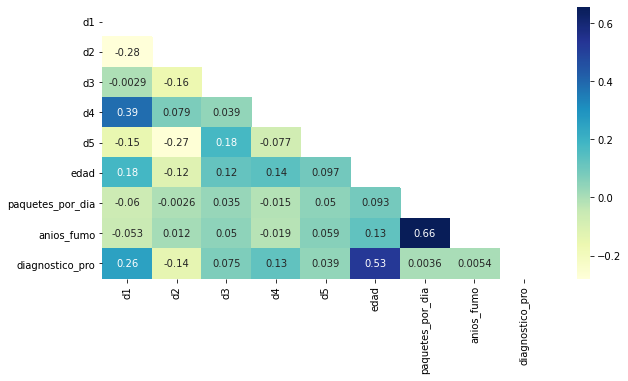

In [151]:
plt.figure(figsize=(10, 5))
matrix = np.triu(df_varnumericas.corr())
sns.heatmap(df_varnumericas.corr(), annot=True, mask=matrix,  cmap="YlGnBu")

No observamos que exista variables altamente correlacionada.

Además, deberemos verificar que su distrbución sea, o almenos aproximadamente, normal.

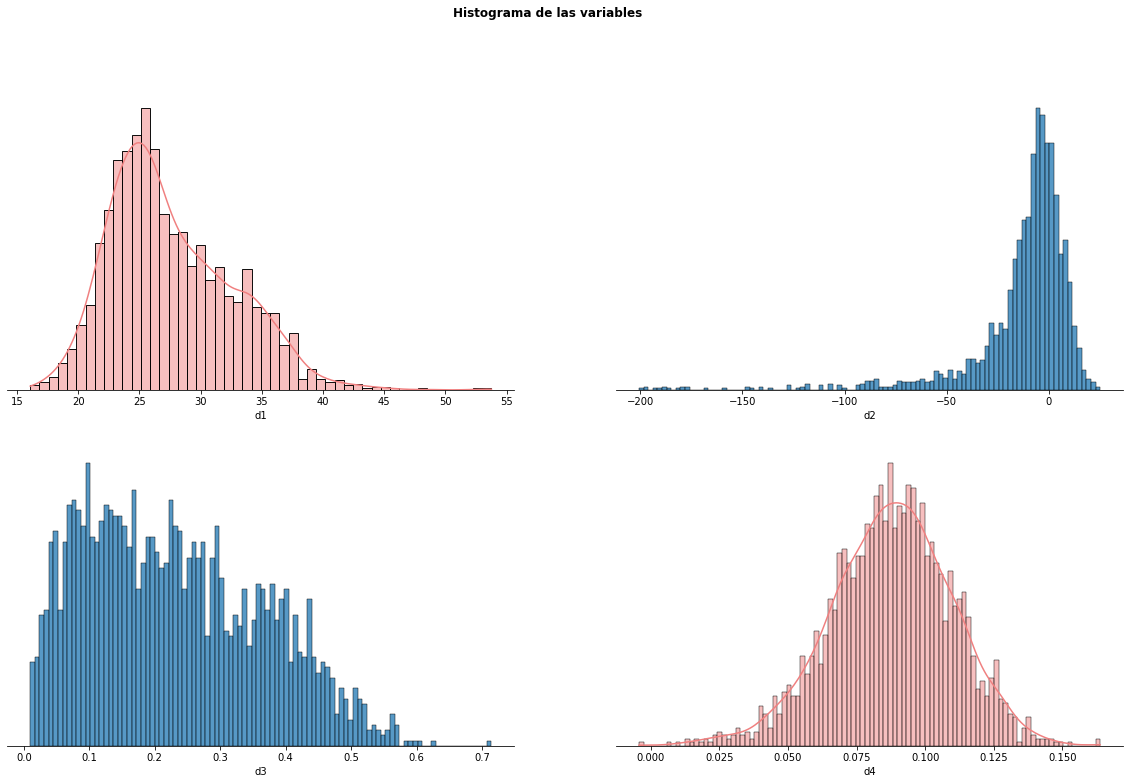

In [140]:

fig=plt.figure(figsize=(20,12), facecolor='white')
plt.suptitle('Histograma de las variables', weight='bold')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])

sns.histplot(x="d1",data=df_varnumericas,ax=ax[0],bins=50,color="lightcoral", kde=True)
sns.histplot(x='d2', data=df_varnumericas,  bins=100, ax=ax[1])
sns.histplot(x='d3', data=df_varnumericas,  bins=100, ax=ax[2])
sns.histplot(x='d4',data=df_varnumericas, bins=100, ax=ax[3], color='lightcoral', kde=True)

for i in range(4):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

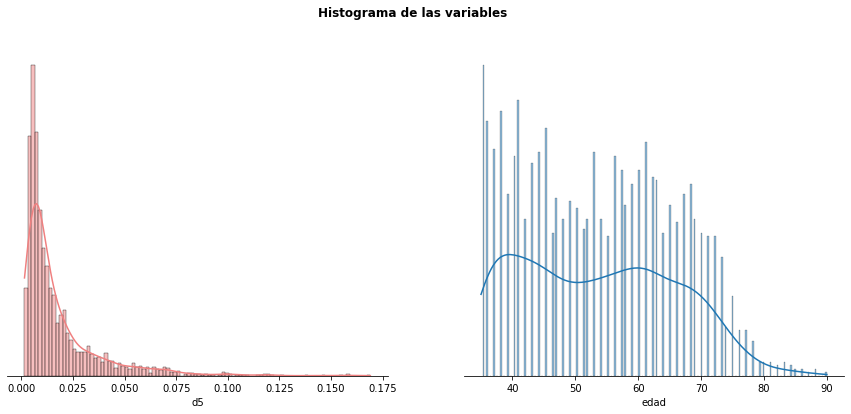

In [150]:

fig=plt.figure(figsize=(15,6), facecolor='white')
plt.suptitle('Histograma de las variables', weight='bold')

gs=fig.add_gridspec(1,2)

ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])


sns.histplot(x="d5",data=df_varnumericas,ax=ax[0],bins=100,color="lightcoral", kde=True)
sns.histplot(x='edad', data=df_varnumericas,shrink=0.5,  bins=100, ax=ax[1], kde=True)


for i in range(2):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

# Variables Categoricas

In [109]:
df_varcategoricas=df_merged2[['id','educ','empleo','genero','estado_marital','facilidad_celular','fumo']]

In [110]:
df_merged3 = df_merged2[['diagnostico_pro',"d1",  "d2", "d3", "d4","d5", "edad", "paquetes_por_dia", "anios_fumo",'educ','empleo','genero','estado_marital','facilidad_celular','fumo']]
#df_merged3['educ'].unique()
#df_merged3['educ'].value_counts()
#df_merged3['empleo'].value_counts()
#df_merged3['genero'].value_counts()
#df_merged3['estado_marital'].value_counts()
#X['facilidad_celular'].value_counts()

In [111]:
X=df_merged3[["d1",  "d2", "d3", "d4", "d5",  "edad", 'educ','empleo','genero','estado_marital','facilidad_celular','fumo']]
X['educ'].replace(np.nan,'4-year college degree' ,inplace=True)
X['empleo'].replace(np.nan,'Employment for wages' ,inplace=True)
X['genero'].replace(np.nan, 2, inplace=True)
X['estado_marital'].replace(np.nan,'Married or domestic partnership', inplace=True)
X['facilidad_celular'].replace(np.nan,'Very easy', inplace=True)
df_final=X
print(X.isna().sum())

d1                   0
d2                   0
d3                   0
d4                   0
d5                   0
edad                 0
educ                 0
empleo               0
genero               0
estado_marital       0
facilidad_celular    0
fumo                 0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# Naive Bayes

Naive Bayes es el algoritmo más sencillo y potente. A pesar de los significativos avances de Machine Learning en los últimos años, ha demostrado su valía. Se ha implementado con éxito en muchas aplicaciones, desde el análisis de texto hasta los motores de recomendación.Asume que el efecto de una caracteristica particular en una clase es indepentiente de las otras caracteristicas.

En este momento ya tenemos separados los datos de “x” con “y”. Ahora es el momento de separar los datos de entrenamiento y prueba, para ello utilizamos la instrucción de train_test_split, la cual nos facilita bastante este procedimiento.

In [112]:
# Encode categorical variables
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [113]:
y=df_merged3[['diagnostico_pro']].values

In [114]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


#best score 0.7970598104 with random_state =10
#AQUI

Seguidamente definimos el algoritmo, en este caso le indicamos a nuestro programa, de sklearn.naive_bayes vamos a importar GaussianNB, con esto ya podemos implementar este algoritmo dentro de nuestro programa.

In [115]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
algoritmo = GaussianNB()

Por tal motivo entrenamos el modelo junto a los datos de entrenamiento.

In [116]:
#Entreno el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

Seguidamente realizamos una predicción junto a los datos de pruebas que separamos previamente.


In [117]:
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

Verifiquemos como es el modelo utilizando las métricas de los problemas de clasificación, para ello vamos a obtener la matriz de confusión. Para esto importamos del modulo sklearn.metrics, confusion_matrix, y aplicamos esta instrucción junto a los datos de prueba y los obtenidos en la predicción realizada previamente.

In [118]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[219  43]
 [ 45 137]]


Ahora veamos la precisión del mismo, para esto importamos precision_score del modulo sklearn.metrics y lo implementamos de igual forma junto a los datos de entrenamiento y los predichos.

In [119]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7611111111111111


## Curva ROC para NAIVE BAYES

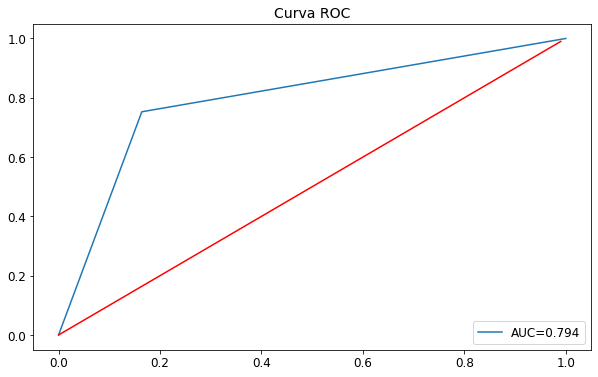

In [120]:
plt.figure(figsize=(10, 6))

from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred).round(10)

# Graficamos la curva roc
plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
#plt.xlabel('% Continuan', fontsize=14)
#plt.ylabel('% Bajas', fontsize=14)
plt.legend(loc=4, fontsize=12)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR, AUC=0.5",color="red")

plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

In [121]:
print(auc)

0.7943125577


# Regresion Logística

Seleccionemos algunas características para el modelado. También cambiamos el tipo de datos de destino para que sea entero, ya que es un requisito del algoritmo skitlearn:


Definamos X e y para nuestro conjunto de datos:

In [122]:
X=df_final[["d1","d2","d3","d4","d5","edad"]]
X = np.asarray(X)

In [123]:
y = np.asarray(df_merged2["diagnostico_pro"])
y [0:6]

array([0., 1., 1., 1., 0., 1.])

## Normalizamos el conjunto de datos:

In [124]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.37, -1.74,  0.59,  0.51,  1.34,  1.33],
       [-0.5 ,  0.75,  1.72,  0.52, -0.6 ,  0.52],
       [ 0.54,  0.75, -1.39,  1.66, -0.72,  1.25],
       [-0.19, -2.69,  0.9 , -0.22,  2.21,  0.03],
       [-0.71,  0.46,  1.5 ,  0.27, -0.51, -0.62]])

## Conjunto de datos de entrenamiento / prueba

Definido “X” y “y” ya podemos realizar la separación correspondiente a los datos de prueba y entrenamiento para ello importamos la respectiva librería y procedemos a utilizar train_test_split para separar los datos.

In [125]:
from sklearn.model_selection import train_test_split

Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [126]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=11)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1774, 6) (1774,)
Test set: (444, 6) (444,)


## Modelado (regresión logística con Scikit-learn)

La versión de Regresión logística en Scikit-learn, admite regularización. La regularización es una técnica utilizada para resolver el problema de sobreajuste en modelos de aprendizaje automático. El parámetro C indica el inverso de la fuerza de regularización, que debe ser un valor flotante positivo. Los valores más pequeños especifican una regularización más fuerte. Ahora ajustemos nuestro modelo con el set de entrenamiento:

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(LR)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [128]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

Y finalmente realizamos una predicción, utilizando la instrucción predict y los datos de prueba.

In [129]:
yhat_prob = LR.predict_proba(X_test)

## Evaluación

Probemos el índice jaccard para evaluar la precisión. podemos definir jaccard como el tamaño de la intersección dividido por el tamaño de la unión de dos conjuntos de etiquetas. Si todo el conjunto de etiquetas predichas para una muestra coincide estrictamente con el conjunto verdadero de etiquetas, entonces la precisión del subconjunto es 1.0; de lo contrario, es 0.0.

In [130]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.5641025641025641

## Matriz de Confusion

Otra forma de ver la precisión del clasificador es mirar la matriz de confusión.

In [137]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 VerticalAlignment="center",
                 color="grey" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[132  50]
 [ 52 210]]


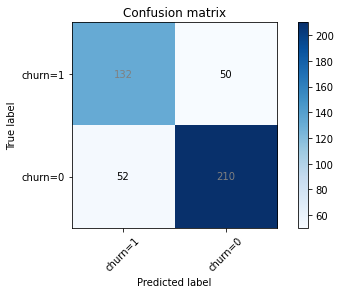

In [138]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [133]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       262
         1.0       0.72      0.73      0.72       182

    accuracy                           0.77       444
   macro avg       0.76      0.76      0.76       444
weighted avg       0.77      0.77      0.77       444



Basándonos en el recuento de cada sección, podemos calcular la precisión y la recuperación de cada etiqueta:

La precisión es una medida de la precisión siempre que se haya predicho una etiqueta de clase. Está definido por: precisión = TP / (TP + FP)

El recuerdo es una verdadera tasa positiva. Se define como: Recuperación = TP / (TP + FN)

Entonces, podemos calcular la precisión y la recuperación de cada clase.

Puntaje F1: ahora estamos en condiciones de calcular los puntajes F1 para cada etiqueta en función de la precisión y el recuerdo de esa etiqueta.

La puntuación F1 es el promedio armónico de la precisión y la recuperación, donde una puntuación F1 alcanza su mejor valor en 1 (precisión y recuperación perfecta) y el peor en 0. Es una buena forma de demostrar que un clasificador tiene un buen valor para ambos recuerdo y precisión.

Y finalmente, podemos decir que la precisión promedio para este clasificador es el promedio de la puntuación F1 para ambas etiquetas, que es 0,72 en nuestro caso.

## log loss - pérdida de registro

Ahora, intentemos la ""log loss"" de registros para su evaluación. En la regresión logística, el resultado puede ser que la probabilidad de que el diagnostico sea sí (o igual a 1). Esta probabilidad es un valor entre 0 y 1. La log loss (pérdida logarítmica) mide el rendimiento de un clasificador donde la salida prevista es un valor de probabilidad entre 0 y 1.

In [134]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob).round(2)

0.52

## Curva ROC para la Regresion Logistica

In [135]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, yhat)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.7634007214159886


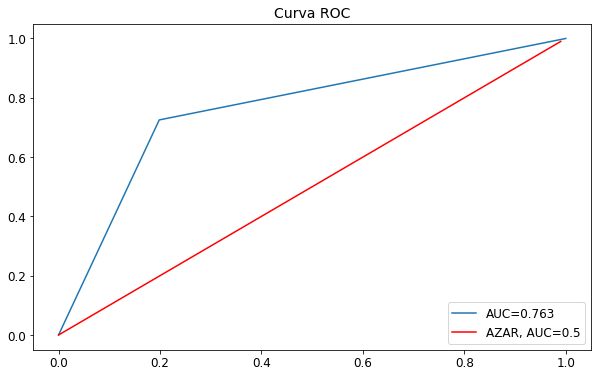

In [136]:
plt.figure(figsize=(10, 6))

fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
auc = metrics.roc_auc_score(y_test, yhat).round(10)

# Graficamos la curva roc
plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
plt.legend(loc=4, fontsize=12)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR, AUC=0.5",color="red")
plt.legend(loc=4, fontsize=12)

plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()